In [ ]:
 !pip install --pre pycaret

In [ ]:
# !pip install --pre pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
# from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
# from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

In [ ]:
!pip install openpyxl

In [ ]:
import xlrd

In [ ]:
import pandas as pd
df = pd.read_excel("/content/sample_data/dataset_02052023.xlsx" )
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [ ]:
df['Timestamp'].head(6)

,Timestamp
0,2022-10-26T08:17:21.847Z
1,2022-10-26T08:17:22.852Z
2,2022-10-26T08:17:23.857Z
3,2022-10-26T08:17:24.863Z
4,2022-10-26T08:17:25.877Z
5,2022-10-26T08:17:26.885Z


In [ ]:
df['Timestamp'] = df['Timestamp'].str.strip('"')

In [ ]:
df['Timestamp'].head(6)

,Timestamp
0,2022-10-26T08:17:21.847Z
1,2022-10-26T08:17:22.852Z
2,2022-10-26T08:17:23.857Z
3,2022-10-26T08:17:24.863Z
4,2022-10-26T08:17:25.877Z
5,2022-10-26T08:17:26.885Z


In [ ]:
# Convert the timestamp column to datetime objects
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%dT%H:%M:%S.%fZ")


In [ ]:
# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%dT%H:%M:%S.%fZ")

# Extract the minutes part
# df['Minutes'] = df['Timestamp'].dt.strftime('%M')
# df['Minutes'] = df['Timestamp'].dt.minute
# df['Seconds'] = df['Timestamp'].dt.second

print(df)


       Num               Timestamp  Current_J0  Temperature_T0  Current_J1  \
0        1 2022-10-26 08:17:21.847    0.109628         27.8750   -2.024669   
1        2 2022-10-26 08:17:22.852    0.595605         27.8750   -2.278456   
2        3 2022-10-26 08:17:23.857   -0.229474         27.8750   -2.800408   
3        4 2022-10-26 08:17:24.863    0.065053         27.8750   -3.687768   
4        5 2022-10-26 08:17:25.877    0.884140         27.8750   -2.938830   
...    ...                     ...         ...             ...         ...   
7404  7405 2022-10-26 15:36:02.555   -0.109017         37.1875   -2.261695   
7405  7406 2022-10-26 15:36:03.562   -0.098536         37.1875   -2.251992   
7406  7407 2022-10-26 15:36:04.571   -0.121100         37.1875   -2.280791   
7407  7408 2022-10-26 15:36:05.572   -0.129370         37.1875   -2.269061   
7408  7409 2022-10-26 15:36:06.580   -0.134429         37.1250   -2.244449   

      Temperature_J1  Current_J2  Temperature_J2  Current_J3  T

In [ ]:
df['Timestamp'].head()

,Timestamp
0,2022-10-26 08:17:21.847
1,2022-10-26 08:17:22.852
2,2022-10-26 08:17:23.857
3,2022-10-26 08:17:24.863
4,2022-10-26 08:17:25.877


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Num                   7409 non-null   int64         
 1   Timestamp             7409 non-null   datetime64[ns]
 2   Current_J0            7363 non-null   float64       
 3   Temperature_T0        7355 non-null   float64       
 4   Current_J1            7355 non-null   float64       
 5   Temperature_J1        7355 non-null   float64       
 6   Current_J2            7355 non-null   float64       
 7   Temperature_J2        7355 non-null   float64       
 8   Current_J3            7355 non-null   float64       
 9   Temperature_J3        7355 non-null   float64       
 10  Current_J4            7355 non-null   float64       
 11  Temperature_J4        7355 non-null   float64       
 12  Current_J5            7355 non-null   float64       
 13  Temperature_J5    

In [ ]:
df.isnull().sum()

,0
Num,0
Timestamp,0
Current_J0,46
Temperature_T0,54
Current_J1,54
Temperature_J1,54
Current_J2,54
Temperature_J2,54
Current_J3,54
Temperature_J3,54


In [ ]:
df=df.fillna(method='ffill')
df.isnull().sum()

<ipython-input-85-13c7913c36d2>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')


,0
Num,0
Timestamp,0
Current_J0,0
Temperature_T0,0
Current_J1,0
Temperature_J1,0
Current_J2,0
Temperature_J2,0
Current_J3,0
Temperature_J3,0


In [ ]:
print(df.columns)

Index(['Num', 'Timestamp', 'Current_J0', 'Temperature_T0', 'Current_J1',
       'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3',
       'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5',
       'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3',
       'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle ',
       'Robot_ProtectiveStop', 'grip_lost'],
      dtype='object')


In [ ]:
df.set_index(df['Timestamp'], inplace=True)

In [ ]:
#  df.drop(  columns=['Num'], inplace=True)
#df.drop(  columns=['Timestamp'], inplace=True)

In [ ]:
print(df.columns)

Index(['Num', 'Timestamp', 'Current_J0', 'Temperature_T0', 'Current_J1',
       'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3',
       'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5',
       'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3',
       'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle ',
       'Robot_ProtectiveStop', 'grip_lost'],
      dtype='object')


In [ ]:
feutures=[ 'Current_J0', 'Temperature_T0', 'Current_J1',
       'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3',
       'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5',
       'Temperature_J5', 'Tool_current']

In [ ]:
df=df[feutures]

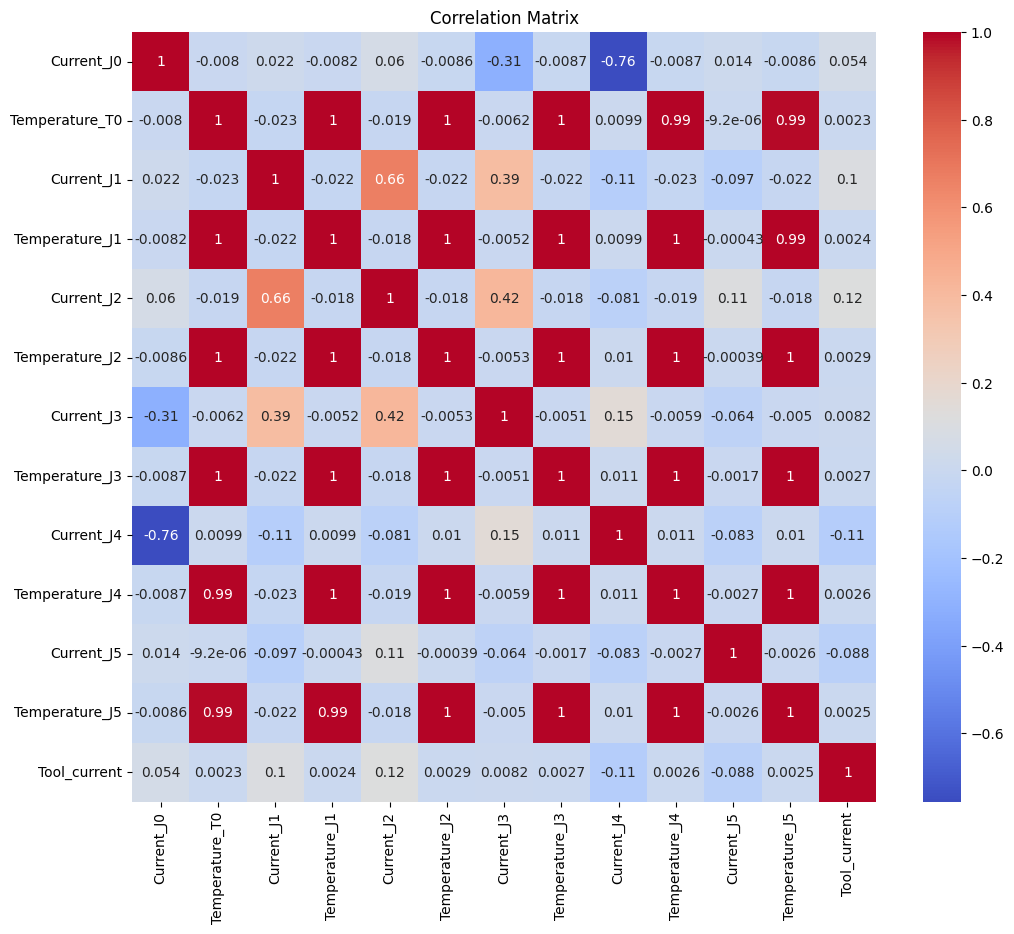

In [ ]:
# prompt: display heat map

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
feutures2=[ 'Tool_current']

In [ ]:
df=df[feutures2].astype(float)

In [ ]:
df.head()

,Tool_current
Timestamp,
2022-10-26 08:17:21.847,0.082732
2022-10-26 08:17:22.852,0.505895
2022-10-26 08:17:23.857,0.079420
2022-10-26 08:17:24.863,0.083325
2022-10-26 08:17:25.877,0.086379


In [ ]:
df.tail()

,Tool_current
Timestamp,
2022-10-26 15:36:02.555,0.080013
2022-10-26 15:36:03.562,0.078740
2022-10-26 15:36:04.571,0.091471
2022-10-26 15:36:05.572,0.090026
2022-10-26 15:36:06.580,0.089097


In [ ]:
df.isnull().sum()

,0
Tool_current,0


In [ ]:
df.head()

,Tool_current
Timestamp,
2022-10-26 08:17:21.847,0.082732
2022-10-26 08:17:22.852,0.505895
2022-10-26 08:17:23.857,0.079420
2022-10-26 08:17:24.863,0.083325
2022-10-26 08:17:25.877,0.086379


In [ ]:
df.isnull().sum()

,0
Tool_current,0


In [ ]:
df_final=df.copy()

In [ ]:
df_final.head()

,Tool_current
Timestamp,
2022-10-26 08:17:21.847,0.082732
2022-10-26 08:17:22.852,0.505895
2022-10-26 08:17:23.857,0.079420
2022-10-26 08:17:24.863,0.083325
2022-10-26 08:17:25.877,0.086379


In [ ]:
df_final=df_final.resample('S').mean()
df_final.head()

,Tool_current
Timestamp,
2022-10-26 08:17:21,0.082732
2022-10-26 08:17:22,0.505895
2022-10-26 08:17:23,0.079420
2022-10-26 08:17:24,0.083325
2022-10-26 08:17:25,0.086379


In [ ]:
df_final=df_final.tail(2000)

<Axes: xlabel='Timestamp'>

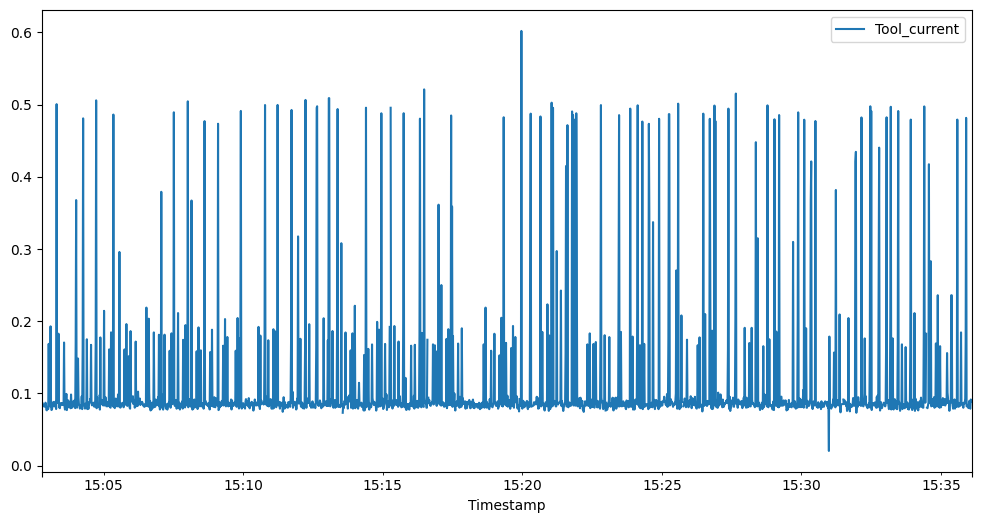

In [ ]:

df_final.plot(figsize=(12,6))

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2022-10-26 15:02:47 to 2022-10-26 15:36:06
Freq: S
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tool_current  1987 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


In [ ]:

df_final = df_final.interpolate(method='linear')


<Axes: xlabel='Timestamp'>

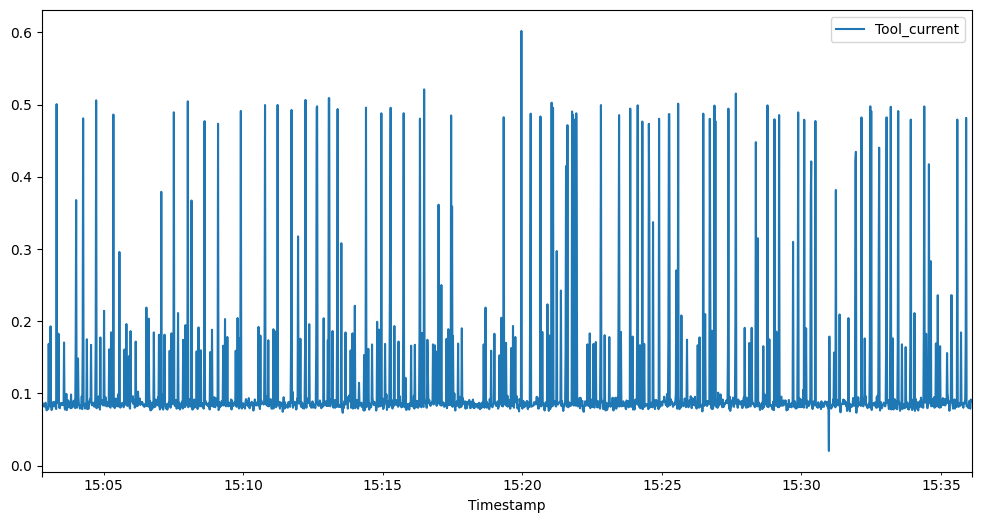

In [ ]:

df_final.plot(figsize=(12,6))

Decompose the time series, explicitly setting the frequency

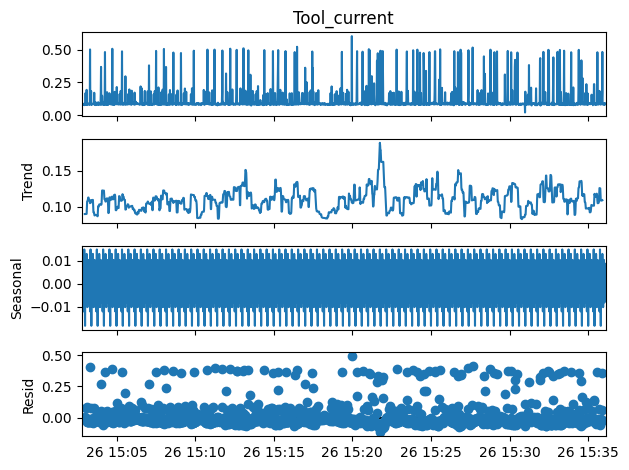

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# results = seasonal_decompose(df_final['Tool_current'])
# results.plot();
# Ensure the 'Timestmp' column is used as index and converted to datetime

df_final.index = pd.to_datetime(df_final.index)

# Decompose the time series, explicitly setting the frequency
results = seasonal_decompose(df_final['Tool_current'], model='additive', period=24)

# Plot the decomposed components
results.plot();

**taking only last 2000 record**

In [ ]:
train = df_final.iloc[:1500]
test = df_final.iloc[1500:]


**import scaler **

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
df_final.head(),df.tail()

(                     Tool_current
 Timestamp                        
 2022-10-26 15:02:47      0.085020
 2022-10-26 15:02:48      0.087058
 2022-10-26 15:02:49      0.086379
 2022-10-26 15:02:50      0.081880
 2022-10-26 15:02:51      0.082474,
                          Tool_current
 Timestamp                            
 2022-10-26 15:36:02.555      0.080013
 2022-10-26 15:36:03.562      0.078740
 2022-10-26 15:36:04.571      0.091471
 2022-10-26 15:36:05.572      0.090026
 2022-10-26 15:36:06.580      0.089097)

**scaler fitting**

In [ ]:

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.0226179 ],
       [0.02647193],
       [0.0251871 ],
       [0.01668312],
       [0.01780491],
       [0.01908962],
       [0.01813054],
       [0.015561  ],
       [0.02647193],
       [0.02390262]])

In [ ]:
!pip install --upgrade keras


In [ ]:

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Use tensorflow.keras to import the TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.0226179  0.02647193 0.0251871 ]
Predict this y: 
 [[0.01668312]]


In [ ]:

# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1488/1488 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0265
Epoch 2/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.0224
Epoch 3/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 0.0265
Epoch 4/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0216
Epoch 5/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0202
Epoch 6/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0260
Epoch 7/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0288
Epoch 8/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0244
Epoch 9/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0233
Epoch 10/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0260
Epoch 11/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0213
Epoch 12/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.0277
Epoch 13/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0248
Epoch 14/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0218
Epoch 15/50
1488

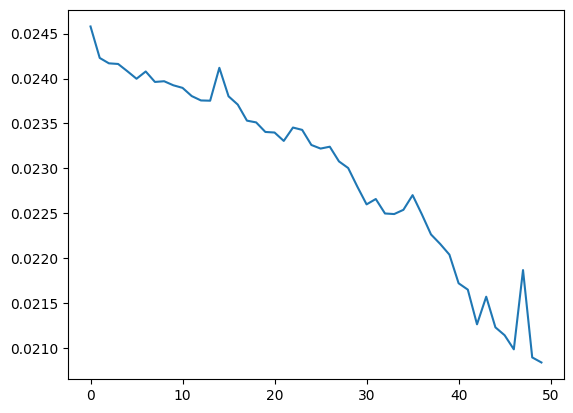

In [ ]:

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([[0.05776203]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.0226179])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [ ]:
test_predictions

[array([0.05776203], dtype=float32),
 array([0.04893488], dtype=float32),
 array([0.03919964], dtype=float32),
 array([0.02491417], dtype=float32),
 array([0.01229377], dtype=float32),
 array([0.08277673], dtype=float32),
 array([0.10248734], dtype=float32),
 array([0.12781033], dtype=float32),
 array([0.1571159], dtype=float32),
 array([0.18189919], dtype=float32),
 array([0.19961339], dtype=float32),
 array([0.16630004], dtype=float32),
 array([0.10047049], dtype=float32),
 array([0.05558885], dtype=float32),
 array([0.06172286], dtype=float32),
 array([0.07277774], dtype=float32),
 array([0.08350286], dtype=float32),
 array([0.08930217], dtype=float32),
 array([0.10171355], dtype=float32),
 array([0.15045673], dtype=float32),
 array([0.26460135], dtype=float32),
 array([0.26391122], dtype=float32),
 array([0.09703989], dtype=float32),
 array([0.06186919], dtype=float32),
 array([0.05433771], dtype=float32),
 array([0.0551966], dtype=float32),
 array([0.06409398], dtype=float32),
 ar

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# Ensure the 'Predictions' column is the same length as the DataFrame
test['Predictions'] = np.nan # Create an empty column with NaN values
test['Predictions'][:len(true_predictions)] = true_predictions.flatten() # Assign predictions to the first 100 rows and flatten the array to be 1 dimensional

<ipython-input-135-c1e547c72a88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = np.nan # Create an empty column with NaN values
<ipython-input-135-c1e547c72a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'][:len(true_predictions)] = true_predictions.flatten() # Assign predictions to the first 100 rows and flatten the array to be 1 dimensional


<Axes: xlabel='Timestamp'>

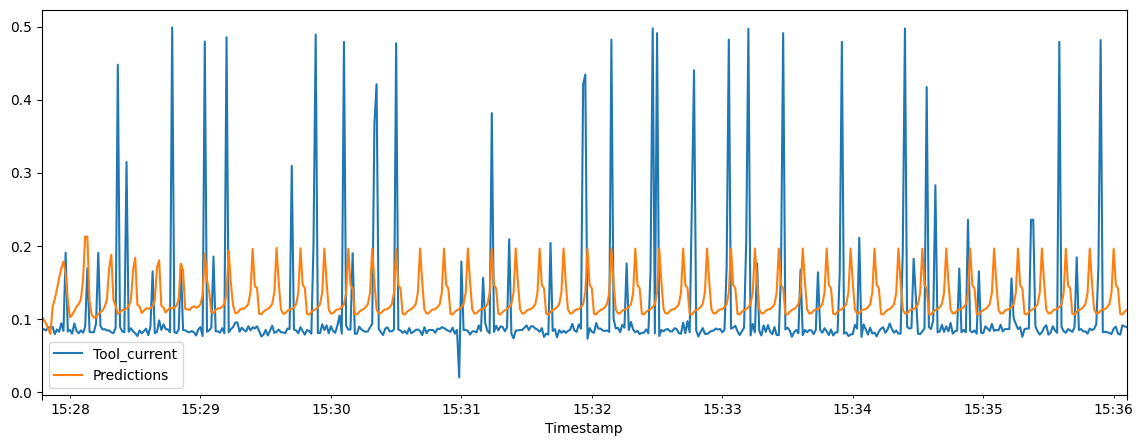

In [ ]:

test.plot(figsize=(14,5))

In [ ]:
# Ensure both columns used to calculate the RMSE have no missing values
rmse=sqrt(mean_squared_error(test['Tool_current'].dropna(),test['Predictions'].dropna()))
print(rmse)

0.08992910208161961
